In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import freqz

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


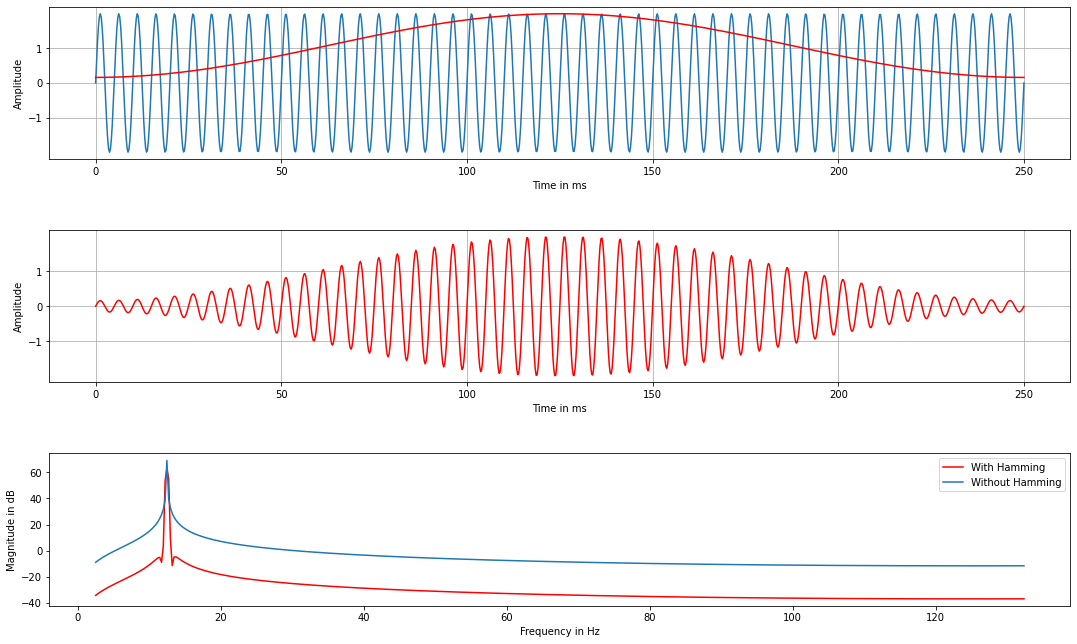

In [215]:
def sample(x):
    Fs = 4/5
    f = 1/5
    # sample = 250 * n
    return 2*np.sin(1.6*np.pi * x * f/Fs)

x1 = np.linspace(0, 250, num=(250+1)*4)
y1 = sample(x1)
fig, axe = plt.subplots(3,1, figsize=(16, 10))
fig.tight_layout(pad=5)
fig = plt.subplot(3,1,1) 
plt.yticks([-1, 0, 1])
plt.plot(x1, y1)
plt.plot(2*np.hamming(251), 'r')
plt.xlabel('Time in ms')
plt.ylabel('Amplitude')
plt.grid()
# plt.show()

fig = plt.subplot(3,1,2)
hamming = np.hamming(251*4)
plt.plot(x1, hamming*y1, 'r')
plt.xlabel('Time in ms')
plt.ylabel('Amplitude')
plt.yticks([-1, 0, 1])
plt.grid()
# plt.show()

plt.subplot(3,1,3)
def todB(x):
    return 10 * np.log(x)
n_samples = len(x1)
left = 10
right = n_samples // 2 + 30
plt.plot(x1[left : right], todB(np.fft.fft(y1 * hamming))[left : right], 'r')
plt.plot(x1[left : right], todB(np.fft.fft(y1))[left : right])
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in dB')
plt.legend(['With Hamming', 'Without Hamming'], loc='best')
# plt.grid()
plt.savefig('bai1.png', dpi = 400)
plt.show()

Bai 2

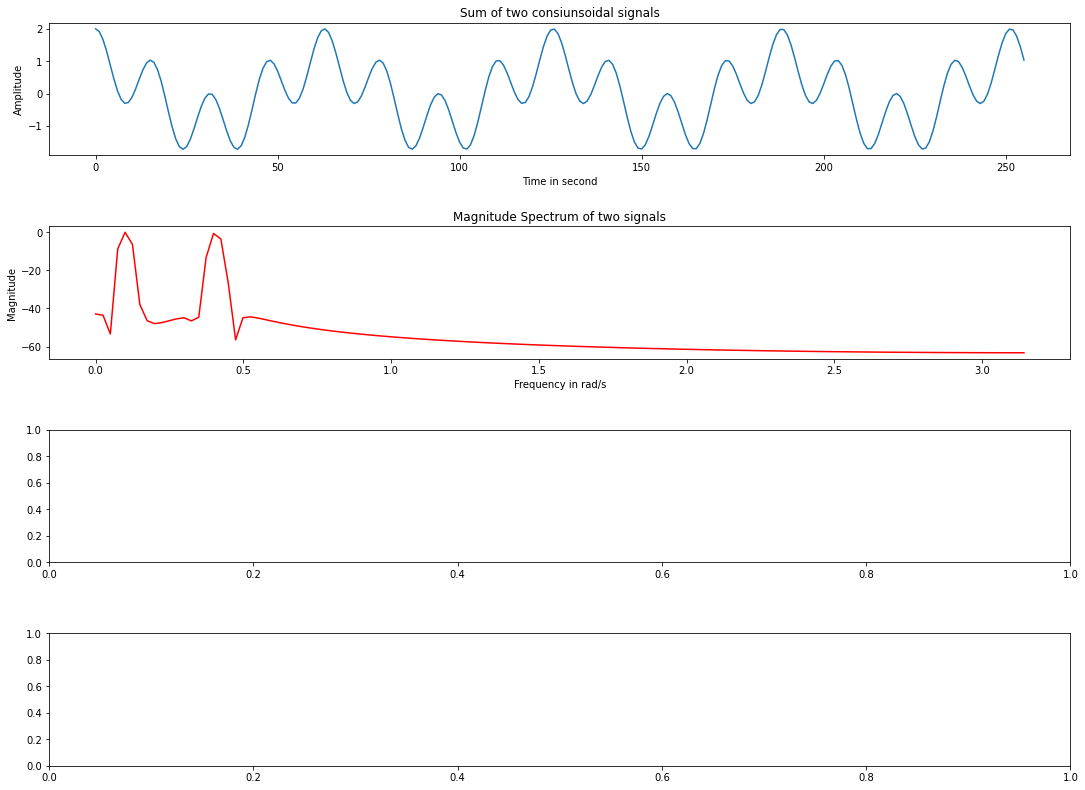

In [6]:
omega1, omega2 = .1, .4
N = 256
a = [1., 0]
b = [-6.76195, 13,456335, -6.76195]
n = np.linspace(0, N-1, num=N)
x = np.cos(omega1*n) + np.cos(omega2*n)

fig, ax = plt.subplots(4,1,figsize=(16,12))
fig.tight_layout(pad=5)
plt.subplot(411)
plt.plot(n, x)
plt.xlabel('Time in second')
plt.ylabel('Amplitude')
plt.title('Sum of two consiunsoidal signals')

plt.subplot(412)
data = x * np.hamming(N)
data_freq = np.fft.fft(data, N)
magSpectrum = np.abs(data_freq)
magDb = 20. * np.log10(magSpectrum / max(magSpectrum))
frequency = np.linspace(0, np.pi, num=N//2 - 1)
plt.plot(frequency, magDb[0:N//2-1], 'r')
plt.xlabel('Frequency in rad/s')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of two signals')

plt.subplot(413)
plt.savefig('bai2.png')
plt.show()